In [321]:
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler

%matplotlib inline

In [322]:
df = pd.read_csv("State_of_Iowa_Salary_Book.csv")
df.head()

,Fiscal Year,Department,Agency/Institution,Name,Gender,Place of Residence,Position,Base Salary,Base Salary Date,Total Salary Paid,Travel & Subsistence
0,2007,"Administrative Services, Department of",NaN,ABELS BEVERLY J,F,POLK,ADVANCED PERSONNEL MGMT,31.62 HR,07/01/2007 12:00:00 AM,6462.34,NaN
1,2007,"Administrative Services, Department of",NaN,ABRAMS JERRY A,M,WAPELLO,EARLY OUT POSITION,TERMINATED,07/01/2007 12:00:00 AM,4242.82,NaN
2,2007,"Administrative Services, Department of",NaN,ADAMS CAROL L,F,MITCHELL,ADVANCED PERSONNEL MGMT,"2,212.80 BW",07/01/2007 12:00:00 AM,55065.60,924.44
3,2007,"Administrative Services, Department of",NaN,ADAMS JEANNIE R,F,POLK,ACCOUNTING TECHNICIAN 2,"1,226.40 BW",07/01/2007 12:00:00 AM,30800.83,6.80
4,2007,"Administrative Services, Department of",NaN,ADAMS NED J,M,POLK,EARLY OUT POSITION,TERMINATED,07/01/2007 12:00:00 AM,10634.33,NaN


In [323]:
df.shape

(665325, 11)

## Cleaning the Data by making the column headers searchable in name

In [324]:
df.rename(columns={'Fiscal Year': 'Fiscal_Year'}, inplace=True)
df.rename(columns={'Agency/Institution': 'Agen_Inst'}, inplace=True)
df.rename(columns={'Place of Residence': 'Place_of_Residence'}, inplace=True)
df.rename(columns={'Base Salary': 'Base_Salary'}, inplace=True)
df.rename(columns={'Base Salary Date': 'Base_Salary_Date'}, inplace=True)
df.rename(columns={'Total Salary Paid': 'Total_Salary_Paid'}, inplace=True)
df.rename(columns={'Travel & Subsistence': 'Travel_Subsistence'}, inplace=True)

df.head()

,Fiscal_Year,Department,Agen_Inst,Name,Gender,Place_of_Residence,Position,Base_Salary,Base_Salary_Date,Total_Salary_Paid,Travel_Subsistence
0,2007,"Administrative Services, Department of",NaN,ABELS BEVERLY J,F,POLK,ADVANCED PERSONNEL MGMT,31.62 HR,07/01/2007 12:00:00 AM,6462.34,NaN
1,2007,"Administrative Services, Department of",NaN,ABRAMS JERRY A,M,WAPELLO,EARLY OUT POSITION,TERMINATED,07/01/2007 12:00:00 AM,4242.82,NaN
2,2007,"Administrative Services, Department of",NaN,ADAMS CAROL L,F,MITCHELL,ADVANCED PERSONNEL MGMT,"2,212.80 BW",07/01/2007 12:00:00 AM,55065.60,924.44
3,2007,"Administrative Services, Department of",NaN,ADAMS JEANNIE R,F,POLK,ACCOUNTING TECHNICIAN 2,"1,226.40 BW",07/01/2007 12:00:00 AM,30800.83,6.80
4,2007,"Administrative Services, Department of",NaN,ADAMS NED J,M,POLK,EARLY OUT POSITION,TERMINATED,07/01/2007 12:00:00 AM,10634.33,NaN


## The Governor has been paid the same salary since 2007

In [325]:
governor = df[df.Position == 'GOVERNOR']
governor.head()

,Fiscal_Year,Department,Agen_Inst,Name,Gender,Place_of_Residence,Position,Base_Salary,Base_Salary_Date,Total_Salary_Paid,Travel_Subsistence
6707,2007,"Governor, Office of",NaN,CULVER CHESTER J,M,POLK,GOVERNOR,"130,000.00 YR",07/01/2007 12:00:00 AM,58969.69,4420.02
6751,2007,"Governor, Office of",NaN,VILSACK THOMAS J,M,POLK,GOVERNOR,TERMINATED,07/01/2007 12:00:00 AM,75500.00,1982.36
38257,2007,"Secretary of State, Office of",NaN,CULVER CHESTER J,M,POLK,GOVERNOR,"130,000.00 YR",07/01/2007 12:00:00 AM,55575.72,NaN
70579,2008,"Governor, Office of",NaN,CULVER CHESTER J,M,POLK,GOVERNOR,"130,000.00 YR",07/01/2008 12:00:00 AM,130000.00,8965.11
134645,2009,"Governor, Office of",NaN,CULVER CHESTER J,M,POLK,GOVERNOR,"130,000.00 YR",07/01/2009 12:00:00 AM,130000.00,336.95


## Since the 2007 Fiscal Year, Iowa has employed about 36,000 females, and about 30,000 males 

In [326]:
df.Gender.value_counts()

F     365135
M     299869
*         44
U          5
m          1
FM         1
Name: Gender, dtype: int64

In [327]:
gender_table = df.groupby('Department')['Gender'].value_counts().reset_index(name = 'gender_counts')
gender_table.head()

,Department,Gender,gender_counts
0,"Administrative Services, Department of",M,1997
1,"Administrative Services, Department of",F,1543
2,"Administrative Services, Department of",M,829
3,"Administrative Services, Department of",F,735
4,"Aging, Department on",F,272


In [328]:
pivot_gender = df.groupby('Department')['Gender'].value_counts().unstack().reset_index()
pivot_gender.head()

Gender,Department,*,F,FM,M,U,m
0,"Administrative Services, Department of",NaN,1543.0,NaN,1997.0,NaN,NaN
1,"Administrative Services, Department of",NaN,735.0,NaN,829.0,NaN,NaN
2,"Aging, Department on",NaN,272.0,NaN,52.0,NaN,NaN
3,"Agriculture & Land Stewardship, Department of",NaN,2124.0,NaN,2393.0,NaN,NaN
4,"Attorney General, Office of",NaN,1802.0,NaN,1258.0,NaN,NaN


In [329]:
pivot_gender.rename(columns={'F': 'Female'}, inplace=True)
pivot_gender.rename(columns={'M': 'Male'}, inplace=True)
pivot_gender.rename(columns={'U': 'Unknown'}, inplace=True)

pivot_gender['Unknown_Other'] = pivot_gender['FM'] + pivot_gender['*'] + pivot_gender['m']

In [330]:
pivot_gender = pivot_gender.drop("*", axis=1)
pivot_gender = pivot_gender.drop("m", axis=1)
pivot_gender = pivot_gender.drop("FM", axis=1)

In [331]:
pivot_gender = pivot_gender.drop("Unknown", axis=1)

In [332]:
pivot_gender.head()

Gender,Department,Female,Male,Unknown_Other
0,"Administrative Services, Department of",1543.0,1997.0,NaN
1,"Administrative Services, Department of",735.0,829.0,NaN
2,"Aging, Department on",272.0,52.0,NaN
3,"Agriculture & Land Stewardship, Department of",2124.0,2393.0,NaN
4,"Attorney General, Office of",1802.0,1258.0,NaN


In [333]:
pivot_gender = pivot_gender.fillna(value=0)

In [334]:
pivot_gender['Total_Employees'] = pivot_gender['Male'] + pivot_gender['Female'] + pivot_gender['Unknown_Other']

In [335]:
pivot_gender['Percent_Male'] = pivot_gender['Male'] / pivot_gender['Total_Employees']
pivot_gender['Percent_Female'] = pivot_gender['Female'] / pivot_gender['Total_Employees']
pivot_gender['Percent_Other'] = pivot_gender['Unknown_Other'] / pivot_gender['Total_Employees']

## In the data from 2007 to 2017, these are the Iowa departments with the best female representation. This still seems too big for charting.
Note, this dataframe does not include the 51 "other/unknown" employees.

In [336]:
pivot_gender = pivot_gender[['Department', 'Female', 'Male', 'Total_Employees',	'Percent_Male',	'Percent_Female']]
Female_Top = pivot_gender.sort_values(by = 'Percent_Female', ascending=False)
Male_Top = pivot_gender.sort_values(by = 'Percent_Male', ascending=False)

In [337]:
Female_Top.head(10)

Gender,Department,Female,Male,Total_Employees,Percent_Male,Percent_Female
2,"Aging, Department on",272.0,52.0,324.0,0.160494,0.839506
14,"Elder Affairs, Department of",102.0,20.0,122.0,0.163934,0.836066
31,Iowa Veterans Home,7987.0,1963.0,9950.0,0.197286,0.802714
49,"Treasurer of State, Office of",266.0,71.0,337.0,0.210682,0.789318
52,"Veterans Affairs, Department of",1966.0,555.0,2521.0,0.220151,0.779849
44,Rebuild Iowa Office,18.0,6.0,24.0,0.250000,0.750000
21,"Human Services, Department of",47588.0,17711.0,65299.0,0.271229,0.728771
41,"Public Health, Department of",4414.0,1694.0,6108.0,0.277341,0.722659
45,"Regents, Board of",2527.0,1005.0,3532.0,0.284541,0.715459
33,Judicial Branch,15671.0,6300.0,21971.0,0.286742,0.713258


In [338]:
gender_count = pivot_gender

In [339]:
gender_count = gender_count.drop("Female", axis=1)

In [340]:
gender_count = gender_count.drop("Male", axis=1)

In [341]:
gender_count = gender_count.drop("Total_Employees", axis=1)

In [342]:
gender_count.head()

Gender,Department,Percent_Male,Percent_Female
0,"Administrative Services, Department of",0.564124,0.435876
1,"Administrative Services, Department of",0.530051,0.469949
2,"Aging, Department on",0.160494,0.839506
3,"Agriculture & Land Stewardship, Department of",0.529776,0.470224
4,"Attorney General, Office of",0.411111,0.588889


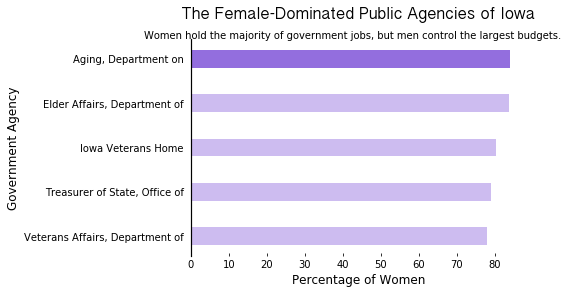

In [351]:
bar_colors = ['#936ede', '#CDBCF0', '#CDBCF0', '#CDBCF0', '#CDBCF0']

ax = Female_Top.head(5).plot(kind='barh', x='Department', y='Percent_Female', color=bar_colors, legend=False, width=.4, rot=0)

ax.set_title("The Female-Dominated Public Agencies of Iowa", pad=20, fontsize=17)
ax.title.set_fontname('Lao Sangam MN')

ax.set_ylabel("Government Agency")
ax.set_xlabel("Percentage of Women")
plt.gcf().text(0.5, .88, "Women hold the majority of government jobs, but men control the largest budgets.", ha='center', fontsize=10)

#FUNCTION FOR THE PERCENTAGE X-AXIS
from matplotlib.ticker import FuncFormatter
def with_percent(value, pos):
    percent = value * 100
    return "{}".format(int(percent))
formatter = FuncFormatter(with_percent)

#CHANGING SOME STYLIZED THINGS
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.rcParams.update({  

  'patch.linewidth': 0.2,
  'patch.facecolor': '#348ABD',
  'patch.edgecolor': '#EEEEEE',
  'patch.antialiased': True,
  'font.size': 10.0,
  'axes.edgecolor': 'black',
  'axes.grid': False,
  'axes.linewidth': 1.2,
  'axes.labelsize': 'large',
  'axes.labelcolor': 'black',

})

ax.set_axisbelow(True)
ax.tick_params(which='major', left=False)

ax.xaxis.set_major_formatter(formatter)

plt.gca().invert_yaxis()

plt.savefig("female_top.pdf")

plt.show()

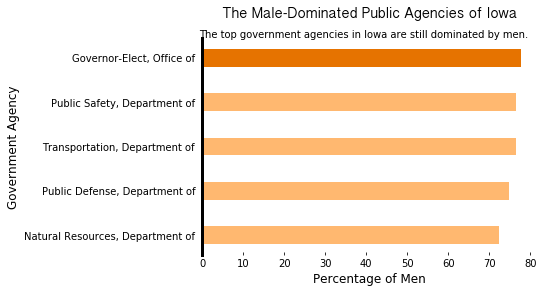

In [356]:
bar_colors2 = ['#e67300', '#FFB870', '#FFB870', '#FFB870', '#FFB870']

ax = Male_Top.head(5).plot(x='Department', y='Percent_Male', kind='barh', color=bar_colors2, legend=False, width=.4)

ax.set_title("The Male-Dominated Public Agencies of Iowa", pad=20)
ax.title.set_fontname('Lao Sangam MN')
ax.title.set_fontsize(15)
ax.set_ylabel("Government Agency")
ax.set_xlabel("Percentage of Men")
plt.gcf().text(0.5, .88, "The top government agencies in Iowa are still dominated by men.", ha='center', fontsize=10)


#CHANGING SOME STYLIZED THINGS
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.rcParams.update({  

  'patch.linewidth': 0.2,
  'patch.facecolor': '#348ABD',
  'patch.edgecolor': 'black',
  'patch.antialiased': False,
  'font.size': 10.0,
  'axes.grid': False,
  'axes.linewidth': 1.2,
  'axes.edgecolor': 'black',
  'axes.labelsize': 'large',
  'axes.labelcolor': 'black'

})

ax.set_axisbelow(False)
ax.tick_params(which='major', left=False)

ax.xaxis.set_major_formatter(formatter)
plt.gca().invert_yaxis()

plt.savefig("male_top.pdf")
plt.show()

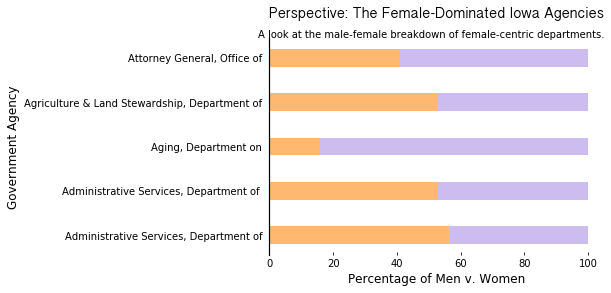

In [354]:
gender_colors = ['#FFB870', '#CDBCF0']

ax = gender_count.head(5).plot(kind='barh', x='Department', stacked=True, color=gender_colors, width=.4, legend=False)

ax.set_title("Perspective: The Female-Dominated Iowa Agencies", pad=20)
ax.title.set_fontname('Lao Sangam MN')
ax.title.set_fontsize(15)
ax.set_ylabel("Government Agency")
ax.set_xlabel("Percentage of Men v. Women")
plt.gcf().text(0.5, .88, "A look at the male-female breakdown of female-centric departments.", ha='center', fontsize=10)

#FUNCTION FOR THE PERCENTAGE X-AXIS
from matplotlib.ticker import FuncFormatter
def with_percent(value, pos):
    percent = value * 100
    return "{}".format(int(percent))
formatter = FuncFormatter(with_percent)

#CHANGING SOME STYLIZED THINGS
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.rcParams.update({  

  'patch.linewidth': 0.2,
  'patch.facecolor': '#348ABD',
  'patch.edgecolor': '#EEEEEE',
  'patch.antialiased': True,
  'font.size': 10.0,
  'axes.edgecolor': 'black',
  'axes.grid': False,
  'axes.linewidth': 1.2,

})

ax.set_axisbelow(True)
ax.tick_params(which='major', left=False)

ax.xaxis.set_major_formatter(formatter)

plt.savefig("split_top.pdf")
plt.show()